In [1]:
import os
import subprocess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker
from time import time as t
from numba import jit

import astropy.units as u
import astropy.constants as c

import PIL
import cycler
import seaborn as sns
from IPython.display import Image, display_png

import photontools
import bokeh


### plt parameters

In [2]:
%matplotlib inline
# %matplotlib notebook

plt.rcParams["axes.prop_cycle"] = cycler.cycler("color", sns.color_palette("colorblind", 10))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "stix"
plt.rcParams["font.size"] = 15
plt.rcParams["figure.dpi"] = 72
# plt.rcParams["figure.dpi"] = 150
# plt.rcParams["figure.dpi"] = 300

lss = ['-', '--', '-.', ':']

In [3]:
N = 4
for i in range(N):
    plt.scatter([i], [0], c=plt.cm.viridis(i/(N-1)), s=500)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

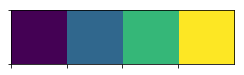

In [4]:
N=4
sns.palplot([plt.cm.viridis(i/(N-1)) for i in range(N)])

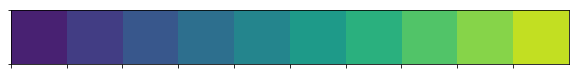

In [5]:
sns.palplot(sns.color_palette("viridis", 10))

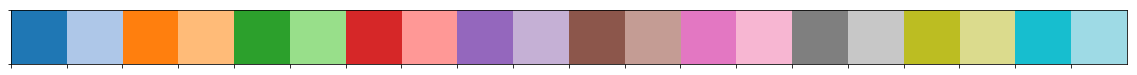

In [7]:
sns.palplot(sns.color_palette("tab20", 20))

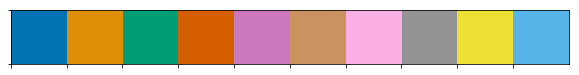

In [8]:
sns.palplot(sns.color_palette("colorblind", 10))

In [9]:
matplotlib.colors.to_hex(sns.color_palette("colorblind", 10)[0])

'#0173b2'

In [10]:
# bands_from_blue = np.array(["UVW2", "UVM2", "UVW1", "U", "B", "V", "R", "I", "J", "H", "K"])
# bands_from_blue = np.array(["UVW2", "UVM2", "UVW1", "U", "B", "V", "R", "I", "J"])
# bands_from_blue = np.array(["UVW2", "UVM2", "UVW1", "u", "g", "r", "i", "J"])
bands_from_blue = np.array(["UVW2", "UVM2", "UVW1", "u", "g", "r", "i", "z", "y"])
# color_from_blue = np.array([plt.cm.viridis(i/(bands_from_blue.size-1)) for i in range(bands_from_blue.size)])
# color_from_blue = np.array([plt.cm.jet(i/(bands_from_blue.size-1)) for i in range(bands_from_blue.size)])
color_from_blue = np.array([plt.cm.jet(i/(bands_from_blue.size)) for i in range(bands_from_blue.size)])
dict_color = dict(zip(bands_from_blue, color_from_blue))

### run parameters

In [19]:
# filepath_he = "../../hewd_hr//gamtmp.d"
filepath_he = "../../after_44ti_correction/he0.2/gamtmp.d"
# filepath_co = "../../cowd/gamtmp.d"
filepath_co = "../../cowd100x50x50/gamtmp.d"

directory_ML = "/Users/kawana/GoogleDrive/sync/study/yoshidalab/mypaper/0002_WD_TDE_radiation_transfer/WhiteDwarf_Thermonuclear_Transients/"
filepaths_spectra_ML = subprocess.getoutput('find "{}/WD06_spectra/" | grep ".par" | sort'.format(directory_ML)).split("\n")[1:]

vel_cowd = np.array([2.56466437e+03, 1.18143578e+04, -1.41779372e+00]) * 1e5
vel_hewd = np.array([3.11475964e+08, 1.12354519e+09, 4.93459615e+04])
vel_hewd[-1] = 0.
vel_cowd[-1] = 0.

# system = "Vega"
system = "AB"
# system = "ST"



In [20]:
filters = photontools.read_all_filters()
filter_twomass, filter_decam, filter_focas, filter_johnson, filter_lsst, filter_ps, filter_sdss, filter_swift, filter_ztf = filters

./photontools/filter_data/2MASS
./photontools/filter_data/DECam
./photontools/filter_data/FOCAS
./photontools/filter_data/Johnson
./photontools/filter_data/LSST
./photontools/filter_data/Pan-Starrs
./photontools/filter_data/SDSS
./photontools/filter_data/Swift
./photontools/filter_data/ZTF


In [21]:
fig = plt.figure(figsize=(10,6))
ax = plt.gca()
dict_color_ = {"u":"C0", "g":"C1", "r":"C2", "i": "C3", "z": "C4", "y": "C5"}   
dict_lss_ = {"DECam": "solid", "LSST":"dashed", "Pan-Starrs":"dotted", "SDSS": "dashdot", "ZTF": (0, (3, 1, 1, 1))}
for j,filter_ in enumerate(filters):
    for i, band in enumerate(filter_.bands):
        if (band[0] in ["u", "g","r", "i", "z", "y"]):
            ax.plot(filter_.wavelengths[i], filter_.response[i]/filter_.response[i].max(), label=filter_.instrument+"_"+band, ls=dict_lss_[filter_.instrument], color=dict_color_[band[0]])
plt.legend(fontsize="xx-small")
plt.xlim(2000,13000)
plt.grid()
# plt.title(filter_.instrument)
plt.savefig("figs/filter_response_ugrizy.png", dpi=300, transparent=True)
plt.show()
#     plt.close()

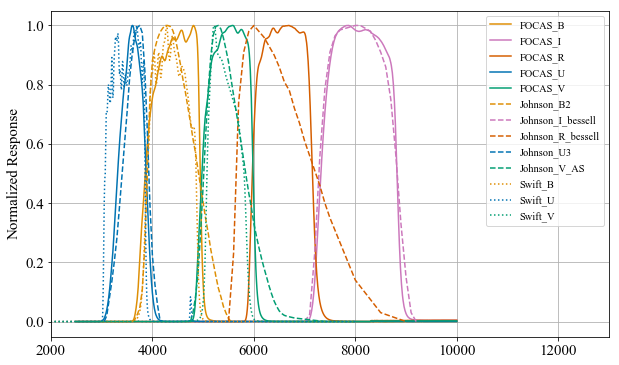

In [22]:
fig = plt.figure(figsize=(10,6))
ax = plt.gca()
dict_color_ = {"U":"C0", "B":"C1", "V": "C2", "R": "C3", "I": "C4"}
dict_lss_ = {"FOCAS": "solid", "Johnson":"dashed", "Swift":"dotted"}
# dict_lss_ = {"DECam": "solid", "LSST":"dashed", "PanStarrs":"dotted", "SDSS": "dashdot", "ZTF": "solid"}
for j,filter_ in enumerate(filters):
    for i, band in enumerate(filter_.bands):
        if (band[0] in ["U","B", "V", "R", "I"]):
            if (band[:2] != "UV"):
#                 if(filter_.instrument)
                ax.plot(filter_.wavelengths[i], filter_.response[i] / filter_.response[i].max(), label=filter_.instrument+"_"+band, color=dict_color_[band[0]], ls=dict_lss_[filter_.instrument])
# 
plt.legend(fontsize="x-small")
plt.ylabel("Normalized Response")
plt.xlim(2000,13000)
plt.grid()
# plt.title(filter_.instrument)
# plt.savefig("figs/filter_response_UBVRI.png", dpi=300, transparent=True)
plt.show()
#     plt.close()

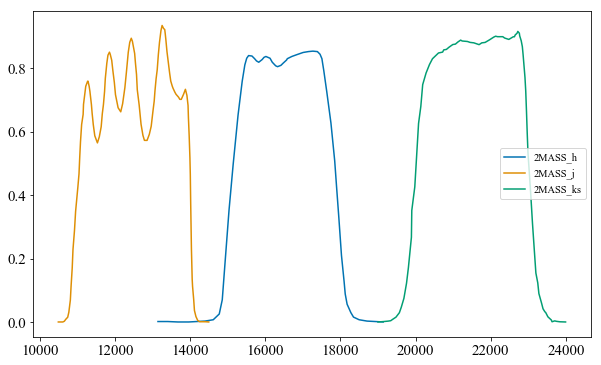

In [23]:
fig = plt.figure(figsize=(10,6))
ax = plt.gca()
# dict_color_ = {"g":"C0", "r":"C1", "i": "C2", "z": "C3", "y": "C4"}
# dict_lss_ = {"DECam": "solid", "LSST":"dashed", "PanStarrs":"dotted", "SDSS": "dashdot", "ZTF": "solid"}
for j,filter_ in enumerate(filters):
    if(filter_.instrument=="2MASS"):
        for i, band in enumerate(filter_.bands):
#         if (band[0] in ["g","r", "i", "z", "y"]):
            ax.plot(filter_.wavelengths[i], filter_.response[i], label=filter_.instrument+"_"+band)
plt.legend(fontsize="x-small")
# plt.title(filter_.instrument)
#     plt.show()
#     plt.close()

In [24]:
%time spectra_co = photontools.read_Maeda_data(filepath_co)

# binning 
%time spectra_co_reduced = spectra_co.binning(N_theta_bins=10, N_phi_bins=10, every_wavelength=1)

# Doppler shift
%time spectra_co_shifted = spectra_co_reduced.Doppler_shift_by_intrinsic_velocity(vel_cowd)


CPU times: user 5.84 s, sys: 10.9 s, total: 16.8 s
Wall time: 24.1 s
CPU times: user 3.64 s, sys: 2.44 s, total: 6.07 s
Wall time: 6.83 s
This Doppler shift only changes spectra.data!
Shift spectra.time later by yourself!
CPU times: user 1.33 s, sys: 127 ms, total: 1.45 s
Wall time: 2.11 s


In [25]:
# system = "Vega"
system = "AB"
# system = "ST"


lc_co_bol     = spectra_co_shifted.calc_bolometric_luminosity().bolometric_luminosity_to_magnitude()
lc_co_focas   = photontools.calc_band_flux(spectra_co_shifted, filter_focas).convert_flux_to_magnitude(filter_focas, system=system)
lc_co_john    = photontools.calc_band_flux(spectra_co_shifted, filter_johnson).convert_flux_to_magnitude(filter_johnson, system=system)
# lc_co_ps      = photontools.calc_band_flux(spectra_co_shifted, filter_ps).convert_flux_to_magnitude(filter_ps, system=system)
lc_co_swift   = photontools.calc_band_flux(spectra_co_shifted, filter_swift).convert_flux_to_magnitude(filter_swift, system=system)
lc_co_twomass = photontools.calc_band_flux(spectra_co_shifted, filter_twomass).convert_flux_to_magnitude(filter_twomass, system=system)


/Users/kawana/GoogleDrive/sync/study/yoshidalab/tidal_disruption/imbh-wd/nuclear/std/compare/snaps/successed/photons/analysis/python/photontools/photontools.py:589: RuntimeWarning: divide by zero encountered in log10
  new_lc.data  = -2.5 * np.log10(self.data[:,:,:] / c.L_bol0.cgs.value)
/Users/kawana/GoogleDrive/sync/study/yoshidalab/tidal_disruption/imbh-wd/nuclear/std/compare/snaps/successed/photons/analysis/python/photontools/photontools.py:626: RuntimeWarning: divide by zero encountered in log10
  new_lc.data = -2.5 * np.log10(self.data / flux_zero_lambda / (4 * np.pi * distance.to(u.cm).value **2))
/Users/kawana/GoogleDrive/sync/study/yoshidalab/tidal_disruption/imbh-wd/nuclear/std/compare/snaps/successed/photons/analysis/python/photontools/photontools.py:626: RuntimeWarning: invalid value encountered in log10
  new_lc.data = -2.5 * np.log10(self.data / flux_zero_lambda / (4 * np.pi * distance.to(u.cm).value **2))
/Users/kawana/GoogleDrive/sync/study/yoshidalab/tidal_disruption/i

In [26]:
lc_ML, spectra_ML = photontools.read_MacLeod_data('/Users/kawana/GoogleDrive/sync/study/yoshidalab/mypaper/0002_WD_TDE_radiative_transfer/WhiteDwarf_Thermonuclear_Transients/')
lc_ML_bol = lc_ML[:,:,:,0]

# mean lightcurve over theta and phi

In [27]:
# i_time_st=0

# plt.figure(figsize=(12,8))

# plt.plot(lc_co_bol.times[i_time_st:], lc_co_bol.data[i_time_st:,:,:].mean(axis=(1,2)), label="Bol", color="black")
# # swift
# list_index_bands = np.argsort(filter_swift.effective_wavelength)
# for i in list_index_bands[:3]:
#     band = lc_co_swift.bands[i]
#     plt.plot(lc_co_swift.times, lc_co_swift.data[i_time_st:,:,:,i].mean(axis=(1,2)), 
#              label=band,
#              color=dict_color[band])

# #johnson
# list_index_bands = np.argsort(filter_johnson.effective_wavelength)
# for i in list_index_bands:
#     band = lc_co_john.bands[i][0]
#     plt.plot(lc_co_john.times, lc_co_john.data[i_time_st:,:,:,i].mean(axis=(1,2)), 
#              label=band,
#              color=dict_color[band])

# #twomass
# list_index_bands = np.argsort(filter_twomass.effective_wavelength)
# for i in list_index_bands:
#     band = lc_co_twomass.bands[i][0].capitalize()
#     plt.plot(lc_co_twomass.times, lc_co_twomass.data[i_time_st:,:,:,i].mean(axis=(1,2)), 
#              label=band,
#              color=dict_color[band])

# plt.legend()



# # plt.title("MacLeod")
# plt.xlabel("time [d]")
# plt.ylabel(r"$M$ (Vega)")
# plt.xlim(0,70)
# plt.ylim(-19,-13)
# plt.grid()
# plt.gca().invert_yaxis()
# # plt.title("solid: High resolution, dotted: Low resolution, dashed: MacLeod")
# # plt.title("solid: High resolution, dotted: Low resolution")
# # plt.legend()
# # plt.savefig("figs/cowd/lc_compare_resolution.png")


# He WD

In [28]:
%time spectra_he = photontools.read_Maeda_data(filepath_he)

%time spectra_he_reduced = spectra_he.binning(N_theta_bins=10, N_phi_bins=10, every_wavelength=1)
# %time spectra_he_reduced = spectra_he.binning(N_theta_bins=20, N_phi_bins=20, every_wavelength=1)

# Doppler shift
%time spectra_he_shifted = spectra_he_reduced.Doppler_shift_by_intrinsic_velocity(vel_hewd)

# binning 
# %time spectra_reduced = spectra_shifted.binning(N_theta_bins=10, N_phi_bins=10, every_wavelength=1)

CPU times: user 2min 21s, sys: 59.5 s, total: 3min 20s
Wall time: 4min 54s
CPU times: user 4.7 s, sys: 2.88 s, total: 7.58 s
Wall time: 8.34 s
This Doppler shift only changes spectra.data!
Shift spectra.time later by yourself!
CPU times: user 1.19 s, sys: 140 ms, total: 1.33 s
Wall time: 1.38 s


In [29]:
# system = "Vega"
system = "AB"
# system = "ST"


lc_he_bol     = spectra_he_shifted.calc_bolometric_luminosity().bolometric_luminosity_to_magnitude()
lc_he_focas   = photontools.calc_band_flux(spectra_he_shifted, filter_focas).convert_flux_to_magnitude(filter_focas, system=system)
lc_he_john    = photontools.calc_band_flux(spectra_he_shifted, filter_johnson).convert_flux_to_magnitude(filter_johnson, system=system)
# lc_he_ps      = photontools.calc_band_flux(spectra_he_shifted, filter_ps).convert_flux_to_magnitude(filter_ps, system=system)
lc_he_swift   = photontools.calc_band_flux(spectra_he_shifted, filter_swift).convert_flux_to_magnitude(filter_swift, system=system)
lc_he_sdss   = photontools.calc_band_flux(spectra_he_shifted, filter_sdss).convert_flux_to_magnitude(filter_sdss, system=system)
lc_he_lsst   = photontools.calc_band_flux(spectra_he_shifted, filter_lsst).convert_flux_to_magnitude(filter_lsst, system=system)
lc_he_twomass = photontools.calc_band_flux(spectra_he_shifted, filter_twomass).convert_flux_to_magnitude(filter_twomass, system=system)


/Users/kawana/GoogleDrive/sync/study/yoshidalab/tidal_disruption/imbh-wd/nuclear/std/compare/snaps/successed/photons/analysis/python/photontools/photontools.py:589: RuntimeWarning: divide by zero encountered in log10
  new_lc.data  = -2.5 * np.log10(self.data[:,:,:] / c.L_bol0.cgs.value)
/Users/kawana/GoogleDrive/sync/study/yoshidalab/tidal_disruption/imbh-wd/nuclear/std/compare/snaps/successed/photons/analysis/python/photontools/photontools.py:626: RuntimeWarning: divide by zero encountered in log10
  new_lc.data = -2.5 * np.log10(self.data / flux_zero_lambda / (4 * np.pi * distance.to(u.cm).value **2))
/Users/kawana/GoogleDrive/sync/study/yoshidalab/tidal_disruption/imbh-wd/nuclear/std/compare/snaps/successed/photons/analysis/python/photontools/photontools.py:626: RuntimeWarning: invalid value encountered in log10
  new_lc.data = -2.5 * np.log10(self.data / flux_zero_lambda / (4 * np.pi * distance.to(u.cm).value **2))
/Users/kawana/GoogleDrive/sync/study/yoshidalab/tidal_disruption/i

In [31]:
fig = plt.figure(figsize=(6,4))

i_time = 9
j_theta = 0
j_theta_ed=10
k_phi=0
k_phi_ed=10

ckeys = {"ls":lss[0]}

plt.plot(lc_he_bol.times[i_time:], lc_he_bol.data[i_time:,j_theta:j_theta_ed,k_phi:k_phi_ed].mean(axis=(1,2)), label="Bolometric", color="black",
        **ckeys
        )
# swift
list_index_bands = np.argsort(filter_swift.effective_wavelength)
for i in list_index_bands[:3]:
    band = lc_he_swift.bands[i]
    plt.plot(lc_he_swift.times[i_time:], lc_he_swift.data[i_time:,j_theta:j_theta_ed,k_phi:k_phi_ed,i].mean(axis=(1,2)), 
             label=band,
             color=dict_color[band],
             **ckeys
            )

# # sdss
# list_index_bands = np.argsort(filter_sdss.effective_wavelength)
# for i in list_index_bands:
#     band = lc_he_sdss.bands[i][0]
#     if (band in  ["u", "g", "r", "i", "z"]):
#         plt.plot(lc_he_sdss.times[i_time:], lc_he_sdss.data[i_time:,j_theta:j_theta_ed,k_phi:k_phi_ed,i].mean(axis=(1,2)),
#                  label=band,
#                  color=dict_color[band],
#                  **ckeys
#                  )

# lsst
list_index_bands = np.argsort(filter_lsst.effective_wavelength)
for i in list_index_bands:
    band = lc_he_lsst.bands[i][0]
    if (band in  ["u", "g", "r", "i", "z", "y"]):
        plt.plot(lc_he_lsst.times[i_time:], lc_he_lsst.data[i_time:,j_theta:j_theta_ed,k_phi:k_phi_ed,i].mean(axis=(1,2)),
                 label=band,
                 color=dict_color[band],
                 **ckeys
                 )


# #johnson
# list_index_bands = np.argsort(filter_johnson.effective_wavelength)
# for i in list_index_bands:
#     band = lc_he_john.bands[i][0]
#     plt.plot(lc_he_john.times[i_time:], lc_he_john.data[i_time:,j_theta:j_theta_ed,k_phi:k_phi_ed,i].mean(axis=(1,2)),
#              label=band,
#              color=dict_color[band],
#              **ckeys
#              )

# #twomass
# list_index_bands = np.argsort(filter_twomass.effective_wavelength)
# for i in list_index_bands:
#     band = lc_he_twomass.bands[i][0].capitalize()
#     if(band == "J"):
# #     if(True):
#         plt.plot(lc_he_twomass.times[i_time:], lc_he_twomass.data[i_time:,j_theta:j_theta_ed,k_phi:k_phi_ed,i].mean(axis=(1,2)), 
#                  label=band,
#                  color=dict_color[band])

plt.legend(fontsize="small")


ckeys = {"ls":lss[1]}

plt.plot(lc_co_bol.times, lc_co_bol.data[:,:,:].mean(axis=(1,2)), label="", color="black", **ckeys)

ckeys = {"ls":lss[3]}

plt.plot(lc_ML_bol.times, -2.5 * np.log10(lc_ML_bol.data[:,:,:].mean(axis=(1,2)) / c.L_bol0.cgs.value), label="", color="black", **ckeys)

    
# plt.title("MacLeod")
plt.xlabel("time [d]")
plt.ylabel(r"Absolute Magnitude (AB/Bolometric)")
plt.xlim(0,70)
plt.ylim(-18,-13)
# plt.ylim(-17,-13)
# plt.grid()
plt.gca().invert_yaxis()
plt.gca().xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(2))
plt.gca().yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(0.2))

# plt.title("solid: Helium WD, dotted: CO WD")
# plt.legend()
fig.tight_layout()
plt.savefig("figs/after_44Ti_correction/he0.2/lightcurve_mean_ugrizy_jet.pdf", dpi=300, transparent=True)
plt.show()
plt.close()

## Color evolution

In [32]:
# i_time_st = 14 # co
i_time_st = 9 # he
# i_time_st = 30 #he

lc_bol_ = lc_he_bol[i_time_st:]


# mask_Bband = np.array([band[0] == "B" for band in filter_johnson.bands])
# lc_B_ = lc_he_john[i_time_st:,:,:,mask_Bband]

# mask_gband = np.array([band[0] == "g" for band in filter_lsst.bands])
# lc_g_ = lc_he_lsst[i_time_st:,:,:,mask_gband]
# mask_rband = np.array([band[0] == "r" for band in filter_lsst.bands])
# lc_r_ = lc_he_lsst[i_time_st:,:,:,mask_rband]
# mask_iband = np.array([band[0] == "i" for band in filter_lsst.bands])
# lc_i_ = lc_he_lsst[i_time_st:,:,:,mask_iband]

peak_mag = np.zeros((lc_bol_.thetas.size, lc_bol_.phis.size), dtype=np.float)
t_peak = np.zeros((lc_bol_.thetas.size, lc_bol_.phis.size), dtype=np.float)
t_1mag = np.zeros((lc_bol_.thetas.size, lc_bol_.phis.size), dtype=np.float)
delta_t_1mag = np.zeros((lc_bol_.thetas.size, lc_bol_.phis.size), dtype=np.float)

# t_B_peak = np.zeros((lc_B_.thetas.size, lc_B_.phis.size), dtype=np.float)
# M_B_peak = np.zeros((lc_B_.thetas.size, lc_B_.phis.size), dtype=np.float)
# delta_m15 = np.zeros((lc_B_.thetas.size, lc_B_.phis.size), dtype=np.float)

indexes_time_peak = lc_bol_.data.argmin(axis=(0))
# indexes_B_peak = lc_B_.data.argmin(axis=(0))

for i in range(lc_bol_.thetas.size):
    for j in range(lc_bol_.phis.size):
        t_peak[i,j]    = lc_bol_.times[indexes_time_peak[i][j]]
        peak_mag[i,j]  = lc_bol_.data[indexes_time_peak[i][j], i, j]
#         t_B_peak[i,j]  = lc_B_.times[indexes_time_peak[i][j]]
#         M_B_peak[i,j]  = lc_B_.data[indexes_B_peak[i][j], i, j]
#         delta_m15[i,j] = np.interp(15 / lc_B_.Doppler_shift_intrinsic[i,j], lc_B_.times - t_peak[i,j], lc_B_.data[:,i,j,0]) - lc_B_.data[indexes_time_peak[i,j],i,j,0]
#         delta_m15[i,j] = np.interp(15 / lc_B_.Doppler_shift_intrinsic[i,j], lc_B_.times - lc_B_.times[indexes_B_peak[i,j]], lc_B_.data[:,i,j,0]) - lc_B_.data[indexes_B_peak[i,j],i,j,0]


index_time_1mag = np.argmin(np.abs(1 + np.tile(peak_mag, (lc_bol_.data.shape[0], 1, 1)).reshape(lc_bol_.data.shape[0], peak_mag.shape[0], peak_mag.shape[1], 1)
                                   - lc_bol_.data), axis=0)

for i in range(lc_bol_.thetas.size):
    for j in range(lc_bol_.phis.size):
        t_1mag[i,j] = lc_bol_.times[index_time_1mag[i,j]]
t_1mag = t_1mag / (spectra_he_shifted.Doppler_shift_intrinsic)
t_peak = t_peak / (spectra_he_shifted.Doppler_shift_intrinsic)
delta_t_1mag = t_1mag - t_peak


(array([ 8.,  5.,  0.,  0.,  3., 24., 10.,  6., 32., 12.]),
 array([2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ]),
 <a list of 10 Patch objects>)

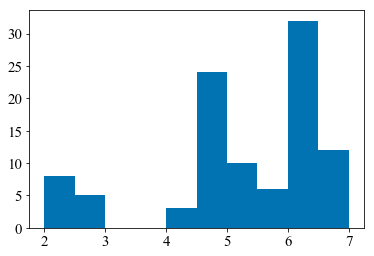

In [33]:
plt.hist(t_peak.flatten(), bins=np.arange(2,7.1,0.5))
# delta_t_1mag

# SPH

# Abundance

In [21]:
# sph_data_total = pd.read_pickle("/Users/kawana/GoogleDrive/sync/study/yoshidalab/tidal_disruption/imbh-wd/nuclear/std/compare/snaps/successed/snap_bh3.16e+02_wd0.20_beta05.0_00786432_he_irirt05_pot2_nuc1/sph_calc_t9999.pickle")
# sph_data_unbound = pd.read_pickle("/Users/kawana/GoogleDrive/sync/study/yoshidalab/tidal_disruption/imbh-wd/nuclear/std/compare/snaps/successed/snap_bh3.16e+02_wd0.20_beta05.0_00786432_he_irirt05_pot2_nuc1/sph_calc_t9999_unbound.pickle")
# sph_data_bound = sph_data_total.query("c1 not in @sph_data_unbound.c1")

# sph_data_total = pd.read_pickle("/Users/kawana/GoogleDrive/sync/study/yoshidalab/tidal_disruption/imbh-wd/nuclear/std/compare/snaps/successed/snap_bh5.00e+02_wd0.60_beta05.0_00393216_co_irirt05_pot0_nuc1_tot/sph_t1000_c136.pickle")
# sph_data_unbound = sph_data_total[sph_data_total["c100"]==4]

In [73]:
sph_data_unbound[["c7", "c8", "c9"]].mean(axis=0)

c7    3.114760e+08
c8    1.123545e+09
c9    4.934596e+04
dtype: float64

In [22]:
mass_ = sph_data_unbound["c3"].iloc[0]
mass_aprox13 = (mass_ * u.g / c.M_sun * sph_data_unbound[sph_data_unbound.columns[31:44]].sum()).cgs.value
mass_stable  = (mass_ * u.g / c.M_sun * sph_data_unbound[sph_data_unbound.columns[65:95]].sum()).cgs.value
mass_active  = (mass_ * u.g / c.M_sun * sph_data_unbound[sph_data_unbound.columns[95:99]].sum()).cgs.value

In [23]:
index_ = ["active Z={:d}".format(i) for i in np.arange(22, 29, 2)]
df_ = pd.DataFrame(mass_active, index=index_).T

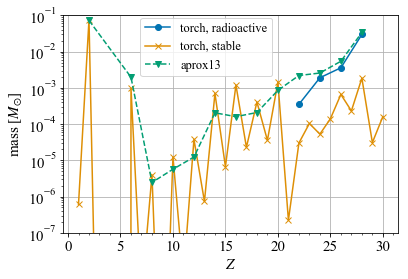

In [24]:
fig = plt.figure(figsize=(6,4))
plt.semilogy(np.arange(22, 30, 2), mass_active, marker="o", label="torch, radioactive")
plt.semilogy(np.arange(1, 31, 1), mass_stable, marker="x", label="torch, stable")
plt.semilogy(np.append([2], np.arange(6, 30, 2, dtype=int)), mass_aprox13, linestyle=lss[1], marker="v", label="aprox13")
# plt.ylim(1e-9,0.3)
plt.ylim(1e-7,0.1)
plt.xlabel(r"$Z$")
plt.ylabel(r"mass [$M_{\odot}$]")
plt.grid()

ax = plt.gca()
ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator())
# ax.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator())

plt.legend(loc=(0.23, 0.72), fontsize="small")
# plt.savefig("figs/cowd/abundance_log_paper2.pdf", dpi=300, transparent=True)
plt.show()


## He mass

In [141]:
mass_stable[1]

0.07620113046504161

In [40]:
mass_ = sph_data_unbound["c3"].iloc[0]
mass_aprox13 = (mass_ * u.g / c.M_sun * sph_data_unbound[sph_data_unbound.columns[31:44]].sum()).cgs.value
mass_stable  = (mass_ * u.g / c.M_sun * sph_data_unbound[sph_data_unbound.columns[65:95]].sum()).cgs.value
mass_active  = (mass_ * u.g / c.M_sun * sph_data_unbound[sph_data_unbound.columns[96:99]].sum()).cgs.value
mass_stable[19] +=  (mass_ * u.g / c.M_sun * sph_data_unbound[sph_data_unbound.columns[95]].sum()).cgs.value
# mass_stable[21] +=  (mass_ * u.g / c.M_sun * sph_data_unbound[sph_data_unbound.columns[95]].sum()).cgs.value

In [41]:
sph_data_unbound[sph_data_unbound.columns[95:99]].sum(), sph_data_unbound[sph_data_unbound.columns[95]].sum()

(c96      1377.914532
 c97      7463.268246
 c98     14071.713417
 c99    116707.886003
 dtype: float64, 1377.9145322515228)

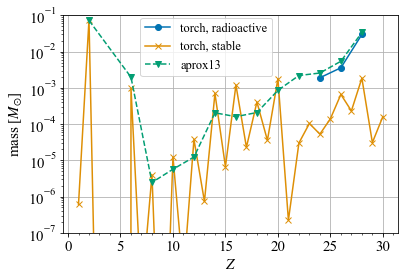

In [42]:
fig = plt.figure(figsize=(6,4))
plt.semilogy(np.arange(24, 30, 2), mass_active, marker="o", label="torch, radioactive")
plt.semilogy(np.arange(1, 31, 1), mass_stable, marker="x", label="torch, stable")
plt.semilogy(np.append([2], np.arange(6, 30, 2, dtype=int)), mass_aprox13, linestyle=lss[1], marker="v", label="aprox13")
# plt.ylim(1e-9,0.3)
plt.ylim(1e-7,0.1)
plt.xlabel(r"$Z$")
plt.ylabel(r"mass [$M_{\odot}$]")
plt.grid()

ax = plt.gca()
ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator())
# ax.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator())

plt.legend(loc=(0.23, 0.72), fontsize="small")
# plt.savefig("figs/hewd/abundance_log_paper_44ti_to_Z20.pdf", dpi=300, transparent=True)
plt.show()


## Fallback rate

In [17]:
from matplotlib.lines import Line2D

In [21]:
Mbh = 10 ** 2.5 * u.Msun

sph_path = "/Users/kawana/GoogleDrive/sync/study/yoshidalab/tidal_disruption/imbh-wd/nuclear/std/compare/snaps/successed/snap_bh3.16e+02_wd0.20_beta05.0_00786432_he_irirt05_pot2_nuc1/sph_t0240_pandas.pickle"
# sph_path = "/Users/kawana/GoogleDrive/sync/study/yoshidalab/tidal_disruption/imbh-wd/nuclear/std/compare/snaps/successed/snap_bh3.16e+02_wd0.20_beta05.0_00786432_he_irirt05_pot2_nuc1/sph_calc_t9999.pickle"
data_sph = pd.read_pickle(sph_path)

# lc_maeda_high_bol = spectra_reduced_high.calc_bolometric_luminosity()


In [22]:
def give_center_of_bin(bin_with_edge, logscale=True):
    bin_with_edge = bin_with_edge.cgs.value
    if(logscale):
        bin_linear = np.log10(bin_with_edge)
    else:
        bin_linear = bin_with_edge
    bin_center = 0.5 * (bin_linear[1:] + bin_linear[:-1])
    if(logscale):
        bin_center = 10 ** bin_center
    return bin_center

def Eddington_lum(Mbh, eta=0.1, kappa=None, Ye=0.5):
    """return (Eddington luminosity, Eddinton accretion rate)"""
    if kappa is None:
        Ledd = 4 * np.pi * c.G * Mbh * c.m_p * c.c / c.sigma_T / Ye
    else:
        Ledd = 4 * np.pi * c.G * Mbh * c.c / kappa        
    MdotEdd = Ledd * c.c ** (-2) / eta
    return Ledd.cgs.value, MdotEdd.cgs.value

def calc_accretion_rate(data:pd.DataFrame, Mbh, time_bin, col_mass=None, col_epsilon=None):
    """
    Mbh and time_bin must be given with units
    time_bin: include the both edges
    """
    def _period_(Mbh, epsilon):
        aaa = 0.5 * c.G * Mbh / (- epsilon * c.c * c.c)
        ret_ =  2 * np.pi * (aaa ** 3 / (c.G * Mbh)) ** (0.5)
        return ret_
    
    if (col_mass is None):
        col_mass = "c3"
    if (col_epsilon is None):
        col_epsilon = "c50"

    data_bound = data[data[col_epsilon] < 0]
    mass_arr    = np.array(data_bound[col_mass])
    epsilon_arr = np.array(data_bound[col_epsilon])
    period_arr  = _period_(Mbh, epsilon_arr)
#     display(_period_(Mbh, epsilon_arr))
#     print(epsilon_arr.min(), _period_(Mbh, epsilon_arr.min()).cgs.value)
#     display(period_arr)
#     display(period_arr.cgs)
#     print(period_arr.cgs.value.min())
    mass_in_each_time_bin = np.histogram(period_arr.cgs.value, bins=time_bin.cgs.value, weights=np.array(mass_arr))[0]
    ret_ = mass_in_each_time_bin / np.diff(time_bin.cgs.value)
    return ret_ * u.g / u.s


In [23]:
time_bin = np.logspace(-4, 2, 100) * u.d
time_bin_center = give_center_of_bin(time_bin, logscale=True)
mdot_ = calc_accretion_rate(data_sph, Mbh, time_bin)

Ledd_ = Eddington_lum(Mbh, Ye=0.1)[0]
Ledd = Eddington_lum(Mbh, kappa=0.2 * u.g /u.cm/u.cm)[0]
print(Ledd_, Ledd)

3.975189084289744e+41 7.90518804708855e+40


In [47]:
(mdot_.max() / c.M_sun).cgs

<Quantity 0.00011869 1 / s>

In [44]:
time_bin[np.argmax(mdot_)].to(u.s)

<Quantity 60.95349196 s>

In [57]:
lc_he_bol     = spectra_he_shifted.calc_bolometric_luminosity()


In [62]:
np.sum(np.diff((time_bin_center * u.s).to(u.s)) * (0.1 * mdot_ * c.c**2).cgs[:-1])

<Quantity 1.53826022e+52 erg>

<IPython.core.display.Javascript object>


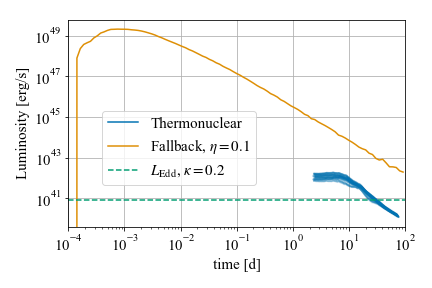

In [83]:
xmin_, xmax_ = time_bin.to(u.d).value.min(), time_bin.to(u.d).value.max()
# xmin_, xmax_ = time_bin.to(u.s).value.min(), time_bin.to(u.s).value.max()

fig = plt.figure()
ax = plt.gca()

first = True
lc_ = lc_he_bol[9:-2]
for i in range(lc_.thetas.size):
    for j in range(lc_.phis.size):
#         if (first):
#             label_="Thermonuclear"
        ax.loglog(lc_.times * spectra_he_shifted.Doppler_shift_intrinsic[i,j], lc_.data[:,i,j], alpha=0.1, color="C0", label=label_)
#         if (first):
#             label_=""
#             first=False


# ax.loglog((time_bin_center * u.s).to(u.s) , (0.1 * mdot_ * c.c**2).cgs, color="C1", label="Fallback")
ax.loglog((time_bin_center * u.s).to(u.d) , (0.1 * mdot_ * c.c**2).cgs, color="C1", label=r"Fallback, $\eta=0.1$")

ax.plot([xmin_, xmax_], [Ledd, Ledd], color="C2", label=r"$L_{\rm {Edd}}$, $\kappa=0.2$", ls=lss[1])

plt.xlabel("time [d]")
plt.ylabel("Luminosity [erg/s]")
plt.xlim(xmin_, xmax_)

handles, labels = ax.get_legend_handles_labels()
handles0 = [Line2D([1e10], [1e10], label="Thermonuclear", color="C0")]
labels0 = ["Thermonuclear"]
handles0.extend(handles)
labels0.extend(labels)
handles = handles0
labels = labels0
# ax.legend(handles, labels, loc="upper right")
ax.legend(handles, labels, loc=(0.1,0.2))
# ax.legend(loc="best", )

plt.grid()

fig.tight_layout()
# plt.savefig("figs/hewd/compare_fallback2.pdf", dpi=300, transparent=True)
plt.show()
# plt.close()


In [81]:
# %matplotlib inline
%matplotlib notebook

plt.rcParams["axes.prop_cycle"] = cycler.cycler("color", sns.color_palette("colorblind", 10))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "stix"
plt.rcParams["font.size"] = 15
plt.rcParams["figure.dpi"] = 72
# plt.rcParams["figure.dpi"] = 150
# plt.rcParams["figure.dpi"] = 300

lss = ['-', '--', '-.', ':']

# snapshot

<Figure size 576x288 with 0 Axes>

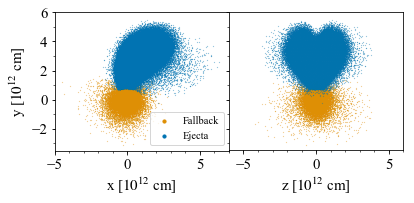

In [346]:
ckeys = {"s":0.1, "marker":".", "alpha":1}

fig = plt.figure(figsize=(8,4))
fig, axes = plt.subplots(1,2, sharey =True)

# lim1 = [-4.5,6.5]
# lim2 = [-3.2,5.8]
# lim3 = [-4.5,4.]

# gskw = dict(width_ratios = [np.diff(lim1)[0],np.diff(lim3)[0]])

# gs = matplotlib.gridspec.GridSpec(1,2, **gskw)

# fig = plt.figure(figsize=(10,5))


ax = axes[0]
# ax=fig.add_subplot(gs[0], aspect="equal",adjustable='box-forced')

x_ = sph_data_bound["c4"] / 1e12
y_ = sph_data_bound["c5"] / 1e12
ax.scatter(x_, y_, color="C1", facecolor="C1", label = "Fallback", **ckeys)
x_ = sph_data_unbound["c4"] / 1e12
y_ = sph_data_unbound["c5"] / 1e12
ax.scatter(x_, y_, color="C0", facecolor="C0", label = "Ejecta", **ckeys)

ax.set_xlabel(r"x [$10^{12}$ cm]")
ax.set_ylabel(r"y [$10^{12}$ cm]")
ax.set_aspect("equal")
# ax.grid()
x_max=7
x_min=-5
ax.set_xlim(x_min, x_max)
ax.set_ylim(-3.5, 6.0)
# x_min, x_max = ax.get_xlim()
width = x_max - x_min
# ax1 = ax
ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator())
ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(2))
ax.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(1))
# ax.set_ylim(-4, 6.)
ax.legend(loc="best", markerscale=20, fontsize="x-small")


# ax=fig.add_subplot(gs[1], aspect="equal",adjustable='box-forced', sharey=ax1)


ax = axes[1]
y_ = sph_data_bound["c5"] / 1e12
x_ = sph_data_bound["c6"] / 1e12
ax.scatter(x_, y_, color="C1", facecolor="C1", label="Fallback", **ckeys)
y_ = sph_data_unbound["c5"] / 1e12
x_ = sph_data_unbound["c6"] / 1e12
ax.scatter(x_, y_, color="C0", facecolor="C1", label="Ejecta", **ckeys)

ax.set_xlabel(r"z [$10^{12}$ cm]")
# plt.ylabel(r"y [$10^{12}$ cm]")
ax.set_aspect("equal")
# ax.grid()
ax.set_xlim(-0.5 * width, 0.5 * width)
ax.set_ylim(-3.5, 6.0)
# ax.set_ylim(-4, 6.)
ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator())
ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(2))
ax.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(1))


fig.tight_layout()
fig.subplots_adjust(wspace=0)
plt.savefig("figs/hewd/particle_distribution_paper.png", dpi=300, transparent=True)
plt.show()
plt.close()


In [363]:
im = PIL.Image.open("figs/hewd/particle_distribution_paper.png")
# im.crop((75,270,1720,890)).save("figs/hewd/particle_distribution_paper-crop2.png")

# comparison with mesh

In [246]:
N_col = 66
colarray = np.linspace(1, N_col, num=N_col).astype(int).astype(str)
colarray.astype(int).astype(str)
col = np.array(['c'] * N_col)
# c1, c2, ..., c58
colarray2 = np.core.defchararray.add(col, colarray)
# id, idofstar, mass, ..., epsilon, angmom, ..., rhomax, ...(58)


In [279]:
fpath_mesh = "/Users/kawana/GoogleDrive/sync/study/yoshidalab/tidal_disruption/imbh-wd/nuclear/std/compare/snaps/successed/snap_bh3.16e+02_wd0.20_beta05.0_00786432_he_irirt05_pot2_nuc1/mesh_calc_t9999_unbound_Nr100_Ntheta50_Nphi50_ri0.00e+00_rf4.00e+12_omp40.dat"
data_mesh = pd.read_csv(fpath_mesh, delim_whitespace=True, header=None, names=colarray2, skiprows=9, )


In [280]:
r_coord = np.append(0, np.unique(data_mesh["c8"]))
theta_coord = (np.unique(data_mesh["c3"]))
theta_coord_w_edge = np.arccos(np.linspace(1, -1, theta_coord.size+1))
phi_coord = (np.unique(data_mesh["c4"]))
phi_coord_w_edge = np.linspace(0, 2*np.pi, phi_coord.size+1)
(theta_coord - 0.51 * np.pi)

array([-1.40187741, -1.25404623, -1.15118544, -1.0666856 , -0.99282695,
       -0.92608174, -0.86448628, -0.80681342, -0.75223469, -0.70015863,
       -0.65014462, -0.60185304, -0.5550147 , -0.50941113, -0.46486125,
       -0.42121222, -0.37833282, -0.33610858, -0.29443813, -0.2532304 ,
       -0.21240238, -0.17187734, -0.13158335, -0.09145198, -0.05141726,
       -0.01141459,  0.02862013,  0.06875149,  0.10904549,  0.14957052,
        0.19039854,  0.23160628,  0.27327673,  0.31550097,  0.35838037,
        0.40202939,  0.44657927,  0.49218285,  0.53902118,  0.58731276,
        0.63732678,  0.68940283,  0.74398157,  0.80165443,  0.86324989,
        0.92999509,  1.00385375,  1.08835359,  1.19121438,  1.33904556])

In [281]:
data_mesh_oplane = data_mesh[np.abs(data_mesh["c3"] - 0.51 * np.pi) < 0.02]
# data_mesh_oplane = data_mesh_oplane.iloc[::2]

In [282]:
data_mesh_oplane["c3"].min(), data_mesh_oplane["c3"].max()

(1.590797660368287, 1.590797660368287)

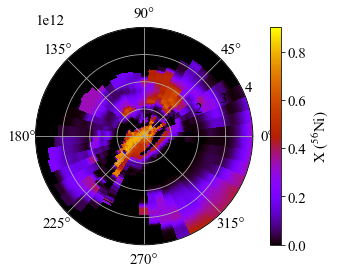

In [294]:
# plt.subplot(projection="polar")
# c_ = np.array(data_mesh_oplane["c66"]).reshape(100,50)
# plt.pcolormesh(phi_coord_w_edge, r_coord, c_, cmap="gnuplot", vmax=0.9)
# plt.grid()
# cb = plt.colorbar()
# cb.set_label(r"X ($^{56}$Ni)")
# plt.savefig("figs/hewd/slice_oplane_mesh.pdf", dpi=300, transparent=True)
# plt.show()

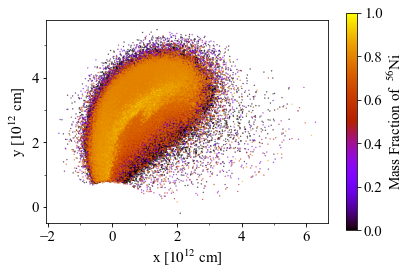

In [244]:
# sph_data_ = sph_data_unbound[np.abs(sph_data_unbound["c6"]) < 1e11]
sph_data_ = sph_data_unbound.sort_values("c99")
# x_ = sph_data_["c101"] / 1e12
# y_ = sph_data_["c102"] / 1e12
# c_ = sph_data_["c99"]
x_ = sph_data_["c4"] / 1e12
y_ = sph_data_["c5"] / 1e12
c_ = sph_data_["c99"]

fig = plt.figure()
plt.scatter(x_, y_, c=c_, s=0.1, cmap="gnuplot", marker="o", vmax=1.0)

cb = plt.colorbar()
cb.set_label(r"Mass Fraction of  $^{56}$Ni")
# plt.xlim(-4,4)
# plt.ylim(-4,4)
plt.xlabel(r"x [$10^{12}$ cm]")
plt.ylabel(r"y [$10^{12}$ cm]")
plt.gca().set_aspect("equal")
# plt.grid()
ax=plt.gca()
ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator())
ax.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator())

fig.tight_layout()
# plt.savefig("figs/hewd/sph_unoubnd_Ni_paper.png", dpi=300, transparent=True)
plt.show()

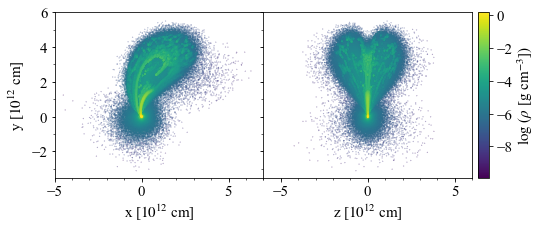

In [369]:
# ckeys = {"s":0.1, "marker":".", "alpha":1, "cmap": "gnuplot"}
ckeys = {"s":0.1, "marker":".", "alpha":1, "cmap": "viridis"}

# fig = plt.figure(figsize=(8,4))
# fig, axes = plt.subplots(1,2, sharey =True)
fig, axes = plt.subplots(1,2, figsize=(8,4), sharey = True)

for ax in axes.ravel():
    ax.set_aspect("equal")

    
fig.subplots_adjust(wspace=0, right=0.85)


# lim1 = [-4.5,6.5]
# lim2 = [-3.2,5.8]
# lim3 = [-4.5,4.]

# gskw = dict(width_ratios = [np.diff(lim1)[0],np.diff(lim3)[0]])

# gs = matplotlib.gridspec.GridSpec(1,2, **gskw)

# fig = plt.figure(figsize=(10,5))

# sph_data_ = sph_data_unbound.sort_values("c16")
sph_data_ = sph_data_total.sort_values("c16")
# x_ = sph_data_["c101"] / 1e12
# y_ = sph_data_["c102"] / 1e12
# c_ = sph_data_["c16"]
x_ = sph_data_["c4"] / 1e12
y_ = sph_data_["c5"] / 1e12
z_ = sph_data_["c6"] / 1e12
c_ = np.log10(sph_data_["c16"])


ax = axes[0]
# ax=fig.add_subplot(gs[0], aspect="equal",adjustable='box-forced')

ax.scatter(x_, y_, c=c_, vmin=-10., vmax=0., **ckeys)

# ax.set_ylim(-0, 6)
ax.set_xlabel(r"x [$10^{12}$ cm]")
ax.set_ylabel(r"y [$10^{12}$ cm]")
ax.set_xlim(-5,7)
ax.set_ylim(-3.5,6)
# ax.set_aspect("equal")
# ax.set_ylim(-0, 6)
ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator())
ax.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(2))

x_min, x_max = ax.get_xlim()
width = x_max - x_min


# ax=fig.add_subplot(gs[1], aspect="equal",adjustable='box-forced', sharey=ax1)

ax = axes[1]
this_plot = ax.scatter(z_, y_, c=c_, vmin=-9.9, vmax=0.2, **ckeys)

ax.set_xlabel(r"z [$10^{12}$ cm]")
# ax.set_aspect("equal")
# ax.set_ylim(-0, 6)
# ax.grid()
ax.set_xlim(-0.5 * width, 0.5 * width)
ax.set_ylim(-3.5,6)
ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator())
ax.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator())
ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(2))
ax_pos = ax.get_position().get_points().flatten() # left, bottom, right, top
left=0.86
width=0.02
cax = fig.add_axes([left, ax_pos[1], width, ax_pos[3]-ax_pos[1]])
cb = fig.colorbar(this_plot, cax=cax, ticks=np.linspace(-10, 2, 7))
# cb.set_label(r"Mass Fraction of  $^{56}$Ni")
cb.set_label(r"$\log$ ($\rho$ [g cm$^{-3}$])")

# fig.tight_layout()
plt.savefig("figs/hewd/particle_distribution_total_paper_both_density.png", dpi=300, transparent=True)
plt.show()
plt.close()


In [350]:
im = PIL.Image.open("figs/hewd/particle_distribution_total_paper_both.png")
im.crop([120, 220,2300, 1120]).save("figs/hewd/particle_distribution_total_paper_both-crop.png")

In [277]:
# Msun_in_gram_in_simulation = (sph_data_unbound["c3"].iloc[0] * 786432) / 0.2
# # Msun_in_gram_in_simulation / c.M_sun.cgs.value
# # (sph_data_unbound["c3"] * sph_data_unbound["c99"]).sum() / c.M_sun.cgs.value
# Msun

1.0003141245524274

### spectra

In [34]:
import matplotlib.colors as colors

In [75]:
# %time spectra_he = photontools.read_Maeda_data(filepath_he)

# # # Doppler shift
# %time spectra_he_shifted = spectra_he.Doppler_shift_by_intrinsic_velocity(vel_hewd)

# binning
%time spectra_he_reduced = spectra_he.binning(N_theta_bins=1, N_phi_bins=1, every_wavelength=1)
# %time spectra_he_reduced = spectra_he_shifted.binning(N_theta_bins=20, N_phi_bins=20, every_wavelength=1)

CPU times: user 1.19 s, sys: 3.86 s, total: 5.06 s
Wall time: 8.72 s


In [76]:
plt.rcParams["figure.dpi"]=100

In [77]:
def give_lines():
    lines_CaII = np.array([3933.66, 3968.47, 8498.02, 8542.09, 8662.14])
    lines_SII = np.array([5432.80, 5453.85, 5473.61, 5606.15, 5640.35])
    lines_SiII = np.array([5957.56, 5978.93, 6347.11, 6371.37])
    lines_HeII = np.array([3203, 4686, 6560])
    lines_HeI = np.array([5876, 7065])
    line_names = ["Ca II", "S II", "Si II", "He II", "He I"]
#     print(np.array(line_names[3] * lines_HeII.size)
    line_names = np.concatenate([np.array([line_names[0]] * lines_CaII.size), 
                                 np.array([line_names[1]] * lines_SII.size), 
                                 np.array([line_names[2]] * lines_SiII.size)])
#                                  np.array([line_names[3]] * lines_HeII.size), 
#                                  np.array([line_names[4]] * lines_HeI.size)])
#     lines_lambda = np.concatenate([lines_CaII, lines_SII, lines_SiII, lines_HeII, lines_HeI])
    lines_lambda = np.concatenate([lines_CaII, lines_SII, lines_SiII])
    return line_names, lines_lambda

def plot_one_line(fig, ax, x, y, name=None, ymin=None, ymax=None, show_label=False, **keys):
    color_dict={"None": "black", "Si": "C0", "S": "C1", "Ca":"C2", "He":"C3"}
    color_dict={"None": "black", "Si": "k", "S": "k", "Ca":"k", "He":"C3"}
    exclude_lines_show_name = np.array([3933.66, 8498.02, 8662.14, 5432.80, 5473.61, 5606.15, 5957.56, 6347.11])
    show_elements = np.array(["Si", "S", "Ca", "He"])
    if name is None:
        element = "None"
    else:
        element = name.split(" ")[0].split("[")[0]

    if ymin is None:
        ymin = ax.get_ylim()[0]
    if ymax is None:
        ymax = ax.get_ylim()[1]

    if (show_label):
        label=name
    else:
        label=""
    if (np.sum(element == show_elements) > 0):
        ax.vlines(x, ymin, ymax, color=color_dict[element], label=label, **keys)
#         if (np.sum(x == exclude_lines_show_name) == 0):
#             print(x, name, x == exclude_lines_show_name)
#             ax.annotate(name ,xy=(x, y), ha="center", backgroundcolor='white', color=color_dict[element])
#         ax.annotate(name ,xy=(x, 0.92 * ax.get_ylim()[1]), color='Black', ha="center")
        

In [78]:
import copy

In [79]:
def binning_spectra_in_wavelength(spectra:photontools.Spectra, wavelength_bin_sep=1):
    new_spectra = copy.deepcopy(spectra)
    wavelengths_with_edge = np.append(np.arange(wavelength_bin_sep * np.int(np.min(spectra.wavelengths) / wavelength_bin_sep),
                                        wavelength_bin_sep * np.int(np.max(spectra.wavelengths) / wavelength_bin_sep),
                                        wavelength_bin_sep
                                       ), wavelength_bin_sep * np.int(np.max(spectra.wavelengths) / wavelength_bin_sep))
    wavelengths_center = 0.5 * (wavelengths_with_edge[1:] + wavelengths_with_edge[:-1])
    weight = np.zeros((wavelengths_center.size, spectra.wavelengths.size-1), dtype=float)
    new_data = np.zeros(wavelengths_center.size, dtype=float)
    for i in range(wavelengths_center.size):
        for j in range(spectra.wavelengths.size-1):
            weight[i, j] = np.max([0, np.min([wavelengths_with_edge[i+1], spectra.wavelengths[j+1]])
                                 - np.max([wavelengths_with_edge[i], spectra.wavelengths[j]])])
    new_data = np.sum(spectra.data[:,:,:,:-1] * weight, axis=(-1))
    new_data = np.sum(spectra.data[:,:,:,:-1] * weight, axis=(-1))
    new_spectra.wavelengths = wavelengths_center
    new_spectra.data = new_data / wavelength_bin_sep
    return new_spectra
#     new_spectra.wavelengths = np.exp(np.log(spectra.wavelengths.reshape(N_wavelength_bins, every_wavelength)).mean(axis=1))
#     last_wavelength  = np.exp(np.log(spectra.wavelengths[-1]) + np.diff(np.log(spectra.wavelengths))[-2])
#     wavelength_delta = np.diff(np.append(spectra.wavelengths, last_wavelength))

#     data = data.reshape(N_time_bins,
#                         N_theta_bins, 
#                         N_phi_bins, 
#                         N_wavelength_bins,
#                         every_wavelength
#                        )
#     # weighted mean of data for wavelength & time
#     data = np.sum(data * wavelength_delta.reshape(N_wavelength_bins, every_wavelength), axis=-1) / wavelength_delta.reshape(N_wavelength_bins, every_wavelength).sum(axis=1)


/Users/kawana/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel/__main__.py:45: RuntimeWarning: divide by zero encountered in log


0 4.073802720033661 3.9905736843003474
1 5.888436421220167 5.913429993009028
2 8.12830492039956 7.96224116445371
3 9.772371879285904 10.066346613820977
4 11.748975103946211 11.79884383508302
5 16.218100241841302 15.954084056977756
6 20.417378420397455 20.000245133658964
7 24.54708782190013 24.04558330882424
8 28.183827692884798 28.30345444442592
9 32.359363733303866 31.698252033608156
10 35.481336701589804 35.820488794583454
11 40.738025103681274 39.90573478918345


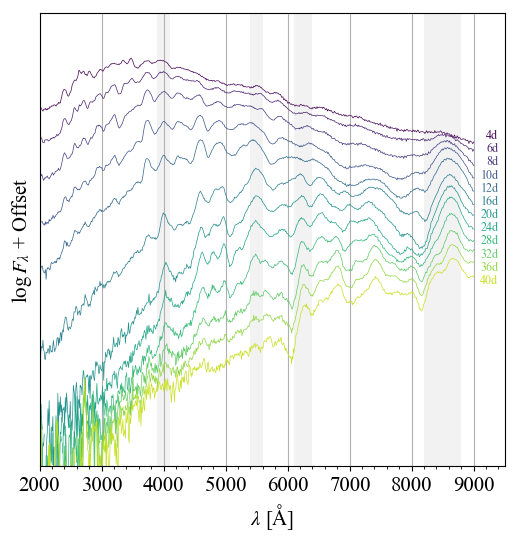

In [82]:
mycolor=plt.cm.viridis
i_time=9
# i_time_ed = -25
i_time_ed = 86
# i_time=64
# i_time_ed = 66
j_theta=0
j_theta_ed=1
k_phi=0
k_phi_ed=1
l_wava=0
l_wava_ed=2549
every_time = 3

fig=plt.figure(figsize=(6,6))
# fig=plt.figure()
ax= plt.gca()

# spectra_ = spectra_he_reduced[i_time:i_time_ed,j_theta:j_theta_ed,k_phi:k_phi_ed,l_wava:l_wava_ed]
# %time spectra_2 = binning_spectra_in_wavelength(spectra_, wavelength_bin_sep=10)
# spectra_2.data = spectra_2.data.reshape(spectra_2.times.size, spectra_2.thetas.size, spectra_2.phis.size, spectra_2.wavelengths.size)

# spectra_2 = spectra_2
times_ = np.append([4,6, 8, 10], np.arange(12, 41, 4))
a_ = np.tile(spectra_.times, (times_.size, 1)).swapaxes(0,1)
t_indexes = np.argmin(np.abs(a_ - times_), axis=0)
t_indexes

width_time = 2
offset_ = - np.append([0, 0.5, 1.0, 1.5, 2.0], 2.5 + 0.1 * np.arange(20))
for i, i_time in enumerate(t_indexes):
    
    i_time_st = i_time - width_time
    i_time_ed = i_time + width_time
    if (i in [1, 3, 4, 5, 8, 10]):
        i_time_ed = i_time + width_time + 1
    if (i in [3]):
        i_time_ed = i_time + width_time + 2
    if (i in [5]):
        i_time_st = i_time - width_time - 1
    if (i in [10]):
        i_time_ed = i_time + width_time + 2
        i_time_st = i_time - width_time - 1
#     offset_ = 0
    plt.plot(spectra_2.wavelengths, offset_[i] + np.log(spectra_2.data[i_time_st:i_time_ed,:,:].mean(axis=(0,1,2))), 
             alpha=1, color=mycolor(i / times_.size), linewidth=0.5)
#     plt.plot(spectra_2.wavelengths, (0.51e39 - offset_ * i_time + spectra_2.data[i_time:i_time_ed,:,k_phi:k_phi_ed].mean(axis=(0,1,2))) / 1e39, 
#              alpha=0.7, color=mycolor(i_time / spectra_2.times.size), linewidth=0.5)
#     plt.plot(spectra_2.wavelengths, + - offset_ * i_time + spectra_2.data[i_time:i_time_ed,:,k_phi:k_phi_ed].mean(axis=(0,1,2)), 
#              alpha=0.7, color=spectra_2.times[i_time:i_time_ed].mean())
    print(i, spectra_2.times[i_time],0.5 * (spectra_2.times[i_time_st] + spectra_2.times[i_time_ed-1]))

# for k_phi in range(spectra_2.phis.size):
#     k_phi_ed = k_phi + 1
#     plt.plot(spectra_2.wavelengths, spectra_2.data[:,:,k_phi:k_phi_ed].mean(axis=(0,1,2)), 
#              alpha=0.7, color=mycolor(k_phi / spectra_2.phis.size))
# plt.plot(spectra_2.wavelengths, spectra_2.data[:,:,:].mean(axis=(0,1,2)), 
#          alpha=0.7, color=mycolor(k_phi / spectra_2.phis.size))

# ymax=1
# lines_name, lines_lambda = give_lines()
# for i in range(lines_lambda.size):
#     line_lambda = lines_lambda[i]
#     line_name = lines_name[i]
# #     if (i in [0, 5, 10]):
# #         plot_one_line(fig, ax, line_lambda, 1.02, line_name, ymin=0, ymax=1, show_label=True,**keys_line)
# #     else:
#     plot_one_line(fig, ax, line_lambda, ymax, line_name, ymin=0, ymax=ymax, linewidth=0.5, show_label=False)

# y_annot=95
# ax.annotate("Si II" ,xy=(6200, y_annot), ha="center", backgroundcolor='white', color="C0")
# ax.annotate("S II" ,xy=(5500, y_annot), ha="center", backgroundcolor='white', color="C1")
# ax.annotate("Ca II" ,xy=(8500, y_annot), ha="center", backgroundcolor='white', color="C2")
# ax.annotate("Ca II" ,xy=(3950, y_annot), ha="center", backgroundcolor='white', color="C2")
# ax.annotate("Si II" ,xy=(6200, y_annot), ha="center", backgroundcolor='white', color="k")
# ax.annotate("S II" ,xy=(5500, y_annot), ha="center", backgroundcolor='white', color="k")
# ax.annotate("Ca II" ,xy=(8500, y_annot), ha="center", backgroundcolor='white', color="k")
# ax.annotate("Ca II" ,xy=(3950, y_annot), ha="center", backgroundcolor='white', color="k")
# # ax.annotate("He II" ,xy=(4686, y_annot), ha="center", backgroundcolor='white', color="C3")
# # ax.annotate("He II" ,xy=(3203, y_annot), ha="center", backgroundcolor='white', color="C3")
# # ax.annotate("He II" ,xy=(4686, y_annot), ha="center", backgroundcolor='white', color="C3")
# # ax.annotate("He I" ,xy=(5876, y_annot), ha="center", backgroundcolor='white', color="C3")
# # ax.annotate("He I" ,xy=(7065, y_annot), ha="center", backgroundcolor='white', color="C3")
# # ax.annotate("He I" ,xy=(6560, y_annot), ha="center", backgroundcolor='white', color="C3")


# # create a colorbar
# # sm = plt.cm.ScalarMappable(cmap=mycolor, norm=plt.Normalize(vmin=spectra_2.times.min(), vmax=spectra_2.times.max()))
# sm = plt.cm.ScalarMappable(cmap=mycolor, norm=colors.LogNorm(vmin=times_.min(), vmax=times_.max()))
# sm._A = []
# cb = plt.colorbar(sm,label=r'time [d]',orientation='vertical',shrink=1.0)
# # cb = plt.colorbar(sm,label=r'Azimuthal Angle $\phi$ ',orientation='vertical',shrink=1.0)

# myticks = times_
# # myticks = np.linspace(0.,2.,9)*np.pi
# mylabel = [r"${:d}$".format(int(i)) for i in times_]
# # mylabel.append("")
# # mylabel.append(r"$24$")
# # mylabel = [r"$0$","",r"$\frac{\pi}{2}$","",r"$\pi$","",r"$\frac{3 \pi}{2}$","",r"$2 \pi$"]
# cb.set_ticks(myticks)
# cb.set_ticklabels(mylabel)

# plt.title(r"w/o Doppler shift, $t = {:.1f}$ d, $\cos\,\theta = {:.1f}$".format(spectra_2.times.mean(), np.abs(np.cos(spectra_2.thetas[:-1].mean()))))
# plt.title(r"w/o Doppler shift, mean over all the angle")
# plt.title(r"$t = {:.0f}$ d, $\theta = {:.2f}$".format(spectra_2.times[i_time:i_time_ed].mean(), spectra_2.thetas[j_theta:j_theta_ed].mean()))
# plt.title(r"$t = {:.1f}$ d, $\theta = {:.2f}$, $\phi = {:.2f}$".format(spectra_2.times[i_time:i_time_ed].mean(), spectra_2.thetas[j_theta:j_theta_ed].mean(), spectra_2.phis[k_phi:k_phi_ed].mean()))
plt.xlabel(r"$\lambda$ [${\rm \AA}$]")
plt.ylabel(r"$\log\, F_\lambda$ + Offset")
plt.xlim(2000, 9500)
ax=plt.gca()
ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(200))
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1000))
# ax.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator())
ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1000))

ymin_= 75
ymax_= 90.5
ax.axvspan(8200, 8800, color="k", alpha=0.05, lw=0, zorder=-1)
ax.axvspan(3900, 4100, color="k", alpha=0.05, lw=0, zorder=-1)
ax.axvspan(5400, 5600, color="k", alpha=0.05, lw=0, zorder=-1)
ax.axvspan(6100, 6400, color="k", alpha=0.05, lw=0, zorder=-1)
for i, d_ in enumerate(times_):
    ax.annotate("{:d}d".format(d_), xy=(9400, 86.2-0.45*i), ha="right", backgroundcolor="white", color=mycolor(i / times_.size), fontsize="xx-small")

plt.ylim(ymin_,ymax_)

plt.grid(zorder=-1)

# plt.savefig("figs/hewd/spectra_t{:.0f}.png".format(spectra_2.times[i_time:i_time_ed].mean()))
plt.savefig("figs/after_44Ti_correction/he0.2/spectra_wo_Doppler_shift_all_angle_paper_log_shaded3.pdf", dpi=300, transparent=True)
plt.show()


In [ ]:
spectra_he.times

In [71]:

# around t= 10
i_time=45
i_time_ed = 55
# i_time=63
# i_time_ed = 74
j_theta = 7
j_theta_ed = 13
l_wava = 2000
l_wava_ed = 2160
# l_wava = 2060
# l_wava_ed = 2100
# l_wava = 2120
# l_wava_ed = 2200
mask = (spectra_he_reduced.wavelengths <  9200) * (spectra_he_reduced.wavelengths >  8000)
mask

spectra_ = spectra_he_reduced[i_time:i_time_ed, j_theta:j_theta_ed, :,mask]
# spectra_center = give_lines()[1][1]
spectra_center = 8600
vel_array = - (1. - spectra_.wavelengths / spectra_center) * c.c.cgs.value / 1e5
spectra_.times, spectra_.times.mean()

(array([12.882495  , 13.48962827, 14.12537485, 14.79108324, 15.48816551,
        16.21810024, 16.98243574, 17.78279326, 18.62087047, 19.49844504]),
 15.987939162903682)

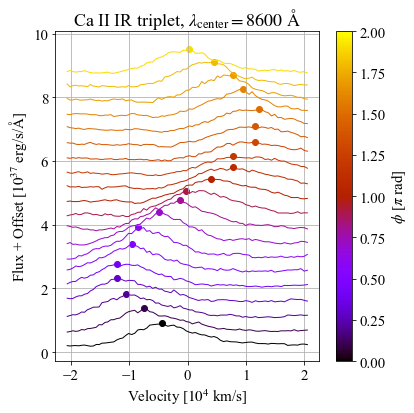

In [74]:
# mycolor=plt.cm.hsv_r
# mycolor=plt.cm.viridis
mycolor=plt.cm.gnuplot
# j_theta=0
# j_theta_ed=1
k_phi=0
k_phi_ed=20
every_phi = 1
keys_line ={"linewidth":0.5}


# fig = plt.figure(figsize=(16,8))
fig = plt.figure(figsize=(6,6))
ax = plt.gca()

for k_phi in np.arange(0, spectra_.phis.size, every_phi):
    k_phi_ed = k_phi + every_phi
    offset_ = - 0.045e39
    offset_2 = 20 * offset_
    offset_2 = 0
#     offset_ = 0
    plt.plot(vel_array/1e4, (offset_2 - offset_ * k_phi + spectra_.data[:,:,k_phi:k_phi_ed].mean(axis=(0,1,2))) / 1e38, 
             alpha=1, linewidth=1, color=mycolor(k_phi / spectra_.phis.size))
    l_max = np.argmax(spectra_.data[:,:,k_phi:k_phi_ed].mean(axis=(0,1,2)))
    plt.scatter(vel_array[l_max]/1e4, (offset_2 - offset_ * k_phi + spectra_.data[:,:,k_phi:k_phi_ed, l_max].mean(axis=(0,1,2))) / 1e38, 
             alpha=1, marker="o", color=mycolor(k_phi / spectra_.phis.size))
#     plt.plot(spectra_.wavelengths, (offset_2 - offset_ * k_phi + spectra_.data[:,:,k_phi:k_phi_ed].mean(axis=(0,1,2))) / 1e39, 
#              alpha=1, linewidth=0.5, color=mycolor(k_phi / spectra_.phis.size))
#     plt.plot(spectra_.wavelengths, + - offset_ * i_time + spectra_.data[i_time:i_time_ed,:,k_phi:k_phi_ed].mean(axis=(0,1,2)), 
#              alpha=1, color=spectra_.times[i_time:i_time_ed].mean())


# lines_name, lines_lambda = give_lines()
# for i in range(lines_lambda.size):
#     line_lambda = lines_lambda[i]
#     line_name = lines_name[i]
# #     if (i in [0, 5, 10]):
# #         plot_one_line(fig, ax, line_lambda, 1.02, line_name, ymin=0, ymax=1, show_label=True,**keys_line)
# #     else:
#     plot_one_line(fig, ax, line_lambda, 1.02, line_name, ymin=0, ymax=1, show_label=False,**keys_line)

# ax.annotate("Si II" ,xy=(6200, 0.95), ha="center", backgroundcolor='white', color="C0")
# ax.annotate("S II" ,xy=(5500, 0.95), ha="center", backgroundcolor='white', color="C1")
# ax.annotate("Ca II" ,xy=(8500, 0.95), ha="center", backgroundcolor='white', color="C2")
# ax.annotate("Ca II" ,xy=(3950, 0.95), ha="center", backgroundcolor='white', color="C2")

# for k_phi in range(spectra_.phis.size):
#     k_phi_ed = k_phi + 1
#     plt.plot(spectra_.wavelengths, spectra_.data[:,:,k_phi:k_phi_ed].mean(axis=(0,1,2)), 
#              alpha=1, color=mycolor(k_phi / spectra_.phis.size))
# plt.plot(spectra_.wavelengths, spectra_.data[:,:,:].mean(axis=(0,1,2)), 
#          alpha=1, color=mycolor(k_phi / spectra_.phis.size))


# create a colorbar
# sm = plt.cm.ScalarMappable(cmap=mycolor, norm=plt.Normalize(vmin=spectra_.times.min(), vmax=spectra_.times.max()))
sm = plt.cm.ScalarMappable(cmap=mycolor, norm=colors.Normalize(vmin=0, vmax=2))
sm._A = []
cb = plt.colorbar(sm,label=r'$\phi$ [$\pi$ rad]',orientation='vertical',shrink=1.0)
# cb = plt.colorbar(sm,label=r'Azimuthal Angle $\phi$ ',orientation='vertical',shrink=1.0)

# myticks = np.arange(0., 2.5, 0.5)
# myticks = np.linspace(0.,2.,9)
# mylabel = [r"${:.1f}$".format(i) for i in np.linspace(0.,2.,9)]
# mylabel = [r"$0$","",r"$\frac{\pi}{2}$","",r"$\pi$","",r"$\frac{3 \pi}{2}$","",r"$2 \pi$"]
# cb.set_ticks(myticks)
# cb.set_ticklabels(mylabel)

# plt.title(r"w/o Doppler shift, $t = {:.1f}$ d, $\cos\,\theta = {:.1f}$".format(spectra_.times.mean(), np.abs(np.cos(spectra_.thetas[:-1].mean()))))
# plt.title(r"w/o Doppler shift, mean over all the angle")
# plt.title(r"$t = {:.0f}$ d, $\theta = {:.2f}$".format(spectra_.times[i_time:i_time_ed].mean(), spectra_.thetas[j_theta:j_theta_ed].mean()))
# plt.title(r"$t = {:.1f}$ d, $\theta = {:.2f}$, $\phi = {:.2f}$".format(spectra_.times[i_time:i_time_ed].mean(), spectra_.thetas[j_theta:j_theta_ed].mean(), spectra_.phis[k_phi:k_phi_ed].mean()))
plt.xlabel(r"Velocity [$10^4$ km/s]")
plt.ylabel(r"Flux + Offset [$10^{37}$ erg/s/${\rm \AA}$]")
# plt.xlim(1000, 9000)

plt.grid()
plt.title(r"Ca II IR triplet, $\lambda_{\rm center} = 8600$ ${\rm \AA}$")
# plt.legend(loc="best")
fig.tight_layout()
# plt.savefig("figs/after_44Ti_correction/he0.2/spectra_vel_CaII_t{:.0f}_paper_vel_corrected.pdf".format(spectra_.times.mean()), dpi=300, transparent=True)
# plt.savefig("figs/hewd/spectra_wo_Doppler_shift_all_angle2pdf", dpi=300, transparent=True)

plt.show()



In [70]:
spectra_.data.shape

(10, 8, 20, 79)

<IPython.core.display.Javascript object>


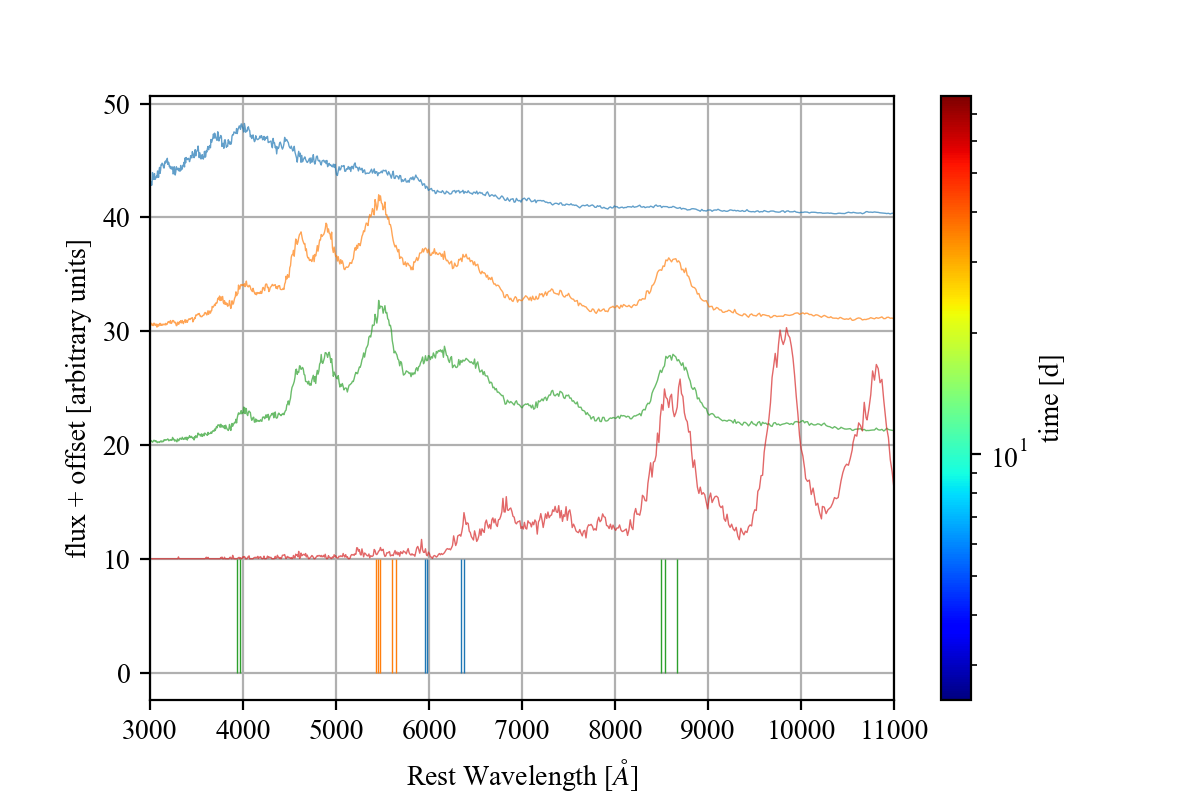

1.0
0.17105263157894737 4.680658428105014
1.0000000000000002
0.4473684210526316 12.311385778316428
0.9999999999999997
0.47368421052631576 13.499166042440912
0.9999999999999999
0.8552631578947368 51.32239635305492


In [433]:
mycolor=plt.cm.jet
i_time=9
# i_time_ed = -25
i_time_ed = -1
# i_time=64
# i_time_ed = 66
j_theta=5
j_theta_ed=15
k_phi=9
k_phi_ed=11
every_time = 3

offset2_ = 40
offset_ = 10
spectra_ = spectra_reduced[i_time:i_time_ed,j_theta:j_theta_ed,k_phi:k_phi_ed]


fig=plt.figure()
ax = plt.gca()

i_time_arr = np.array([13, 34, 36, 65])
for i, i_time in enumerate(i_time_arr):
    i_time_ed = i_time + every_time
    i_time_st = i_time - every_time
#     offset_ = 0
    data_ = spectra_.data[i_time_st:i_time_ed,:,:].mean(axis=(0,1,2))
    data_ = data_ / data_.mean()
    plt.plot(spectra_.wavelengths, (offset2_ - offset_ * i + data_), 
             alpha=0.7, linewidth=0.5, color="C{:1d}".format(i))
    print(data_.mean())
#     plt.plot(spectra_.wavelengths, + - offset_ * i_time + spectra_.data[i_time:i_time_ed,:,k_phi:k_phi_ed].mean(axis=(0,1,2)), 
#              alpha=0.7, color=spectra_.times[i_time:i_time_ed].mean())
    print(i_time / spectra_.times.size, spectra_.times[i_time:i_time_ed].mean())

# for k_phi in range(spectra_.phis.size):
#     k_phi_ed = k_phi + 1
#     plt.plot(spectra_.wavelengths, spectra_.data[:,:,k_phi:k_phi_ed].mean(axis=(0,1,2)), 
#              alpha=0.7, color=mycolor(k_phi / spectra_.phis.size))
# plt.plot(spectra_.wavelengths, spectra_.data[:,:,:].mean(axis=(0,1,2)), 
#          alpha=0.7, color=mycolor(k_phi / spectra_.phis.size))


lines_name, lines_lambda = give_lines()
for i in range(lines_lambda.size):
    line_lambda = lines_lambda[i]
    line_name = lines_name[i]
#     if (i in [0, 5, 10]):
#         plot_one_line(fig, ax, line_lambda, 1.02, line_name, ymin=0, ymax=1, show_label=True,**keys_line)
#     else:
    plot_one_line(fig, ax, line_lambda, 90, line_name, ymin=0, ymax=10, linewidth=0.5, show_label=False)

ax.annotate("Si II" ,xy=(6200, 80), ha="center", backgroundcolor='white', color="C0")
ax.annotate("S II" ,xy=(5500, 80), ha="center", backgroundcolor='white', color="C1")
ax.annotate("Ca II" ,xy=(8500, 80), ha="center", backgroundcolor='white', color="C2")
ax.annotate("Ca II" ,xy=(3950, 80), ha="center", backgroundcolor='white', color="C2")



# create a colorbar
# sm = plt.cm.ScalarMappable(cmap=mycolor, norm=plt.Normalize(vmin=spectra_.times.min(), vmax=spectra_.times.max()))
sm = plt.cm.ScalarMappable(cmap=mycolor, norm=colors.LogNorm(vmin=spectra_.times.min(), vmax=spectra_.times.max()))
sm._A = []
cb = plt.colorbar(sm,label=r'time [d]',orientation='vertical',shrink=1.0)
# cb = plt.colorbar(sm,label=r'Azimuthal Angle $\phi$ ',orientation='vertical',shrink=1.0)





# myticks = np.arange(2.,25, 2.)
# # myticks = np.linspace(0.,2.,9)*np.pi
# mylabel = [r"${:d}$".format(int(i)) for i in np.arange(2.,22, 2.)]
# mylabel.append("")
# mylabel.append(r"$24$")
# # mylabel = [r"$0$","",r"$\frac{\pi}{2}$","",r"$\pi$","",r"$\frac{3 \pi}{2}$","",r"$2 \pi$"]
# cb.set_ticks(myticks)
# cb.set_ticklabels(mylabel)

# plt.title(r"w/o Doppler shift, $t = {:.1f}$ d, $\cos\,\theta = {:.1f}$".format(spectra_.times.mean(), np.abs(np.cos(spectra_.thetas[:-1].mean()))))
# plt.title(r"w/o Doppler shift, mean over all the angle")
# plt.title(r"$t = {:.0f}$ d, $\theta = {:.2f}$".format(spectra_.times[i_time:i_time_ed].mean(), spectra_.thetas[j_theta:j_theta_ed].mean()))
# plt.title(r"$t = {:.1f}$ d, $\theta = {:.2f}$, $\phi = {:.2f}$".format(spectra_.times[i_time:i_time_ed].mean(), spectra_.thetas[j_theta:j_theta_ed].mean(), spectra_.phis[k_phi:k_phi_ed].mean()))
# plt.legend()
plt.xlabel(r"Rest Wavelength [$\AA$]")
plt.ylabel(r"flux + offset [arbitrary units]")
# plt.ylabel(r"flux + offset [$10^{39}$ erg/s/$\AA$]")
plt.xlim(3000, 11000)

plt.grid()
# plt.savefig("figs/hewd/spectra_t{:.0f}.png".format(spectra_.times[i_time:i_time_ed].mean()))
# plt.savefig("figs/hewd/spectra_wo_Doppler_shift_all_angle.pdf", dpi=300)
# plt.show()



In [428]:
%matplotlib notebook
plt.rcParams["figure.dpi"] = 100


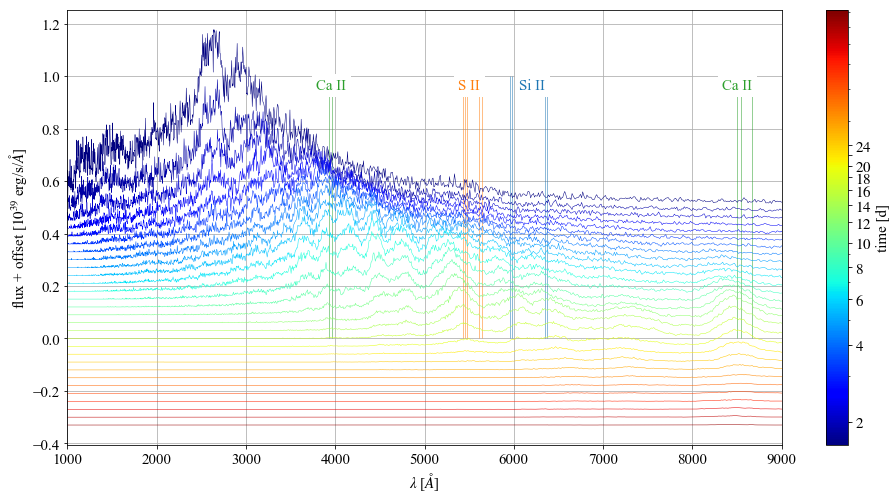

In [40]:
mycolor=plt.cm.jet
i_time=-30
i_time_ed = -1
# i_time=64
# i_time_ed = 66
j_theta=0
j_theta_ed=1
k_phi=0
k_phi_ed=1
every_time = 3
keys_line ={"linewidth":0.5}



fig = plt.figure(figsize=(16,8))
# fig = plt.figure(figsize=(6,4))
ax = plt.gca()
# mycolor=plt.cm.viridis

# spectra_ = spectra_reduced[i_time:i_time_ed,j_theta:j_theta_ed,k_phi:k_phi_ed]
# spectra_ = spectra_reduced[i_time:i_time_ed,j_theta:j_theta_ed,:]
# %time spectra__ = spectra.binning(N_theta_bins=1, N_phi_bins=1, every_wavelength=1)
# spectra_=spectra__[i_time:i_time_ed]
# for i_time in np.arange(0, spectra_.times.size, every_time):
for i_time in np.arange(40, spectra_.times.size, every_time):
    i_time_ed = i_time + every_time
    offset_ = 0.01e39
#     offset_ = 0
    plt.plot(spectra_.wavelengths, (0.51e39 - offset_ * i_time + spectra_.data[i_time:i_time_ed,:,k_phi:k_phi_ed].mean(axis=(0,1,2))) / 1e39, 
             alpha=0.7, linewidth=0.5, color=mycolor(i_time / spectra_.times.size))
#     plt.plot(spectra_.wavelengths, + - offset_ * i_time + spectra_.data[i_time:i_time_ed,:,k_phi:k_phi_ed].mean(axis=(0,1,2)), 
#              alpha=0.7, color=spectra_.times[i_time:i_time_ed].mean())


lines_name, lines_lambda = give_lines()
for i in range(lines_lambda.size):
    line_lambda = lines_lambda[i]
    line_name = lines_name[i]
#     if (i in [0, 5, 10]):
#         plot_one_line(fig, ax, line_lambda, 1.02, line_name, ymin=0, ymax=1, show_label=True,**keys_line)
#     else:
    plot_one_line(fig, ax, line_lambda, 1.02, line_name, ymin=0, ymax=1, show_label=False,**keys_line)

ax.annotate("Si II" ,xy=(6200, 0.95), ha="center", backgroundcolor='white', color="C0")
ax.annotate("S II" ,xy=(5500, 0.95), ha="center", backgroundcolor='white', color="C1")
ax.annotate("Ca II" ,xy=(8500, 0.95), ha="center", backgroundcolor='white', color="C2")
ax.annotate("Ca II" ,xy=(3950, 0.95), ha="center", backgroundcolor='white', color="C2")

# for k_phi in range(spectra_.phis.size):
#     k_phi_ed = k_phi + 1
#     plt.plot(spectra_.wavelengths, spectra_.data[:,:,k_phi:k_phi_ed].mean(axis=(0,1,2)), 
#              alpha=0.7, color=mycolor(k_phi / spectra_.phis.size))
# plt.plot(spectra_.wavelengths, spectra_.data[:,:,:].mean(axis=(0,1,2)), 
#          alpha=0.7, color=mycolor(k_phi / spectra_.phis.size))


# create a colorbar
# sm = plt.cm.ScalarMappable(cmap=mycolor, norm=plt.Normalize(vmin=spectra_.times.min(), vmax=spectra_.times.max()))
sm = plt.cm.ScalarMappable(cmap=mycolor, norm=colors.LogNorm(vmin=spectra_.times.min(), vmax=spectra_.times.max()))
sm._A = []
cb = plt.colorbar(sm,label=r'time [d]',orientation='vertical',shrink=1.0)
# cb = plt.colorbar(sm,label=r'Azimuthal Angle $\phi$ ',orientation='vertical',shrink=1.0)

myticks = np.arange(2.,25, 2.)
# myticks = np.linspace(0.,2.,9)*np.pi
mylabel = [r"${:d}$".format(int(i)) for i in np.arange(2.,22, 2.)]
mylabel.append("")
mylabel.append(r"$24$")
# mylabel = [r"$0$","",r"$\frac{\pi}{2}$","",r"$\pi$","",r"$\frac{3 \pi}{2}$","",r"$2 \pi$"]
cb.set_ticks(myticks)
cb.set_ticklabels(mylabel)

# plt.title(r"w/o Doppler shift, $t = {:.1f}$ d, $\cos\,\theta = {:.1f}$".format(spectra_.times.mean(), np.abs(np.cos(spectra_.thetas[:-1].mean()))))
# plt.title(r"w/o Doppler shift, mean over all the angle")
# plt.title(r"$t = {:.0f}$ d, $\theta = {:.2f}$".format(spectra_.times[i_time:i_time_ed].mean(), spectra_.thetas[j_theta:j_theta_ed].mean()))
# plt.title(r"$t = {:.1f}$ d, $\theta = {:.2f}$, $\phi = {:.2f}$".format(spectra_.times[i_time:i_time_ed].mean(), spectra_.thetas[j_theta:j_theta_ed].mean(), spectra_.phis[k_phi:k_phi_ed].mean()))
plt.xlabel(r"$\lambda$ [$\AA$]")
plt.ylabel(r"flux + offset [$10^{39}$ erg/s/$\AA$]")
plt.xlim(1000, 9000)

plt.grid()
# plt.legend(loc="best")
# fig.tight_layout()
# plt.savefig("figs/hewd/spectra_t{:.0f}.png".format(spectra_.times[i_time:i_time_ed].mean()))
# plt.savefig("figs/hewd/spectra_wo_Doppler_shift_all_angle2.pdf", dpi=300, transparent=True)

# plt.show()

